# Communicate Data Findings 
## by Nkemakolam Onyemachi
## Introduction

In this project, I will conduct an exploratory data analysis on this [dataset](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000).
The dataset is from Prosper loans which is a peer-to-peer lending marketplace. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from 2k to 40k per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors. 

This project will investigate the dataset and communicate the findings from the investigation.


# Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Gathering

### Convert the csv file to a dataframe

In [2]:
# print description of dataset's variables
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Data Assess

### Copy the dataframe to a new variable

In [3]:
df_copy =df.copy()

### Check the information on the dataframe

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Issues
* Choose columns that are neccessary to this analysis
* Duplicate rows
* Null values in Borrowers state, Borrower APR, ProsperRating (Alpha), Occupation, EmploymentStatus,  DebtToIncomeratio.

* ListcreationDate column in string data type instead of date.
* Statedmonthlyincome is in more than two decimal places and it is a currency which is supposed to be two decimal places.

In [5]:
features = ['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome' ,'ProsperRating (Alpha)', 
        'ProsperRating (numeric)','Occupation','Term','EmploymentStatus','DebtToIncomeRatio','MonthlyLoanPayment','Investors']
df_loan = df_copy[features]
df_loan.head()

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,Investors
0,193129,2007-08-26 19:09:29.263000000,9425,Completed,0,CO,0.16516,0.1580,3083.333333,NaN,NaN,Other,36,Self-employed,0.17,330.43,258
1,1209647,2014-02-27 08:28:07.900000000,10000,Current,2,CO,0.12016,0.0920,6125.000000,A,6.0,Professional,36,Employed,0.18,318.93,1
2,81716,2007-01-05 15:00:47.090000000,3001,Completed,0,GA,0.28269,0.2750,2083.333333,NaN,NaN,Other,36,Not available,0.06,123.32,41
3,658116,2012-10-22 11:02:35.010000000,10000,Current,16,GA,0.12528,0.0974,2875.000000,A,6.0,Skilled Labor,36,Employed,0.15,321.45,158
4,909464,2013-09-14 18:38:39.097000000,15000,Current,2,MN,0.24614,0.2085,9583.333333,D,3.0,Executive,36,Employed,0.26,563.97,20


In [6]:
#check for information
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  ProsperRating (numeric)    84853 non-null   float64
 11  Occupation                 110349 non-null  object 
 12  Term                       113937 non-null  int64  
 13  EmploymentStatus           11

In [7]:
#check the tail
df_loan.tail(50)

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,Investors
113887,750747,2013-04-11 11:57:23.830000000,6500,Current,1,IN,0.21156,0.1874,12500.000000,C,4.0,Professional,60,Employed,0.16000,167.69,1
113888,1214654,2014-02-27 17:56:48.587000000,3000,Current,7,MD,0.14853,0.1199,1000.000000,A,6.0,Other,36,Employed,0.20000,99.63,1
113889,581624,2012-04-23 13:55:02.287000000,4000,Chargedoff,13,CO,0.17969,0.1224,8333.333333,B,5.0,Computer Programmer,12,Employed,0.17000,355.84,42
113890,182018,2007-08-05 13:14:14.447000000,10000,Completed,0,GA,0.15462,0.1475,3333.333333,NaN,NaN,Computer Programmer,36,Full-time,0.16000,345.43,281
113891,119186,2007-04-04 18:33:17.170000000,3000,Completed,0,NaN,0.19543,0.1808,3250.000000,NaN,NaN,Professional,36,Full-time,0.04000,105.90,133
113892,1150203,2014-01-20 08:20:38.413000000,8000,Current,7,MA,0.15223,0.1239,10000.000000,A,6.0,Nurse (RN),36,Employed,0.12000,267.21,1
113893,1170177,2014-01-30 08:18:26.497000000,12000,Current,2,CA,0.12081,0.0930,5000.000000,A,6.0,Retail Management,36,Self-employed,NaN,383.27,1
113894,438537,2009-12-15 18:50:46.193000000,1000,Completed,3,VA,0.07339,0.0700,7500.000000,AA,7.0,Investor,36,Full-time,NaN,30.88,58
113895,990985,2013-11-12 19:23:58.323000000,14000,Current,2,CA,0.20398,0.1800,7500.000000,C,4.0,Engineer - Mechanical,60,Employed,0.23000,355.51,1
113896,275772,2008-02-04 15:05:16.950000000,2200,Chargedoff,5,IL,0.32327,0.2995,1166.666667,NaN,NaN,Food Service,36,Part-time,0.26000,93.33,28


In [8]:
#check for duplicates
df_loan.duplicated().sum()

871

In [9]:
#drop duplicates
df_loan =df_loan.drop_duplicates()


In [10]:
df_loan.duplicated().sum()

0

In [11]:
df_loan.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
LoanOriginalAmount               0
LoanStatus                       0
ListingCategory (numeric)        0
BorrowerState                 5515
BorrowerAPR                     25
BorrowerRate                     0
StatedMonthlyIncome              0
ProsperRating (Alpha)        29084
ProsperRating (numeric)      29084
Occupation                    3529
Term                             0
EmploymentStatus              2255
DebtToIncomeRatio             8472
MonthlyLoanPayment               0
Investors                        0
dtype: int64

##### Fill missing value of occupation column as 'unknown'

In [12]:
df_loan.Occupation = df_loan.Occupation.fillna('Unknown')

**Round up statedmontlyincome column to decimal places since it is a monetary value**

In [13]:
df_loan['StatedMonthlyIncome']= df_loan['StatedMonthlyIncome'].round(decimals = 2)

##### fill in the missing values of the debttoincomeratio column with the mean

In [14]:
df_loan.DebtToIncomeRatio = df_loan.DebtToIncomeRatio.fillna(df_loan.DebtToIncomeRatio.mean())

##### select rows only where ProsperRating is not null as this is one of the most important features of the dataset

In [15]:
df_loan = df_loan[df_loan['ProsperRating (Alpha)'].notnull()]

##### Split ListingCreationDate column into year,month,day,time

In [16]:
df_loan['year']=df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_loan['month'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

##### unique values of month

In [17]:
df_loan.month.unique()

array(['02', '10', '09', '12', '04', '05', '07', '08', '11', '01', '06',
       '03'], dtype=object)

##### replace the numerical values of month column with names

In [18]:
df_loan.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace=True)

In [19]:
df_loan.month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [20]:
df_loan['ListingCreationDate'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [21]:
df_loan['day'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
df_loan['time'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [22]:
# drop the original ListingCreationDate column
df_loan.drop(columns = ['ListingCreationDate'],inplace = True)

**Rename Column ListingCategory (Numeric) to ListingCategory and replace the numeric variables to their characteristic string variables**

In [23]:
df_loan.rename(columns ={'ListingCategory (numeric)':'ListingCategory'},inplace=True)
df_loan.head()

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory,BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,Investors,year,month,day,time
1,1209647,10000,Current,2,CO,0.12016,0.0920,6125.00,A,6.0,Professional,36,Employed,0.18,318.93,1,2014,Feb,27,08:28:07.900000000
3,658116,10000,Current,16,GA,0.12528,0.0974,2875.00,A,6.0,Skilled Labor,36,Employed,0.15,321.45,158,2012,Oct,22,11:02:35.010000000
4,909464,15000,Current,2,MN,0.24614,0.2085,9583.33,D,3.0,Executive,36,Employed,0.26,563.97,20,2013,Sept,14,18:38:39.097000000
5,1074836,15000,Current,1,NM,0.15425,0.1314,8333.33,B,5.0,Professional,60,Employed,0.36,342.37,1,2013,Dec,14,08:26:37.093000000
6,750899,3000,Current,1,KS,0.31032,0.2712,2083.33,E,2.0,Sales - Retail,36,Employed,0.27,122.67,1,2013,Apr,12,09:52:56.147000000


In [24]:
df_loan.ListingCategory.unique()

array([ 2, 16,  1,  7, 13,  6, 15, 20, 19, 18,  3,  8, 11, 14,  9, 17, 10,
        0,  5, 12], dtype=int64)

In [25]:
df_loan.ListingCategory.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],['Unavailable','Debt Consolidation', 'Home Improvement','Business','Personal Loan','Student use',
                                                                                                           'Auto', 'Other', 'Baby Adoption','Boat', 'Cosmetic Procedure', 'Engagement ring',' Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle',
                                                                                                            'RV', 'Taxes','Vacation','Wedding Loans'], inplace=True)
df_loan.head()

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory,BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,Investors,year,month,day,time
1,1209647,10000,Current,Home Improvement,CO,0.12016,0.0920,6125.00,A,6.0,Professional,36,Employed,0.18,318.93,1,2014,Feb,27,08:28:07.900000000
3,658116,10000,Current,Motorcycle,GA,0.12528,0.0974,2875.00,A,6.0,Skilled Labor,36,Employed,0.15,321.45,158,2012,Oct,22,11:02:35.010000000
4,909464,15000,Current,Home Improvement,MN,0.24614,0.2085,9583.33,D,3.0,Executive,36,Employed,0.26,563.97,20,2013,Sept,14,18:38:39.097000000
5,1074836,15000,Current,Debt Consolidation,NM,0.15425,0.1314,8333.33,B,5.0,Professional,60,Employed,0.36,342.37,1,2013,Dec,14,08:26:37.093000000
6,750899,3000,Current,Debt Consolidation,KS,0.31032,0.2712,2083.33,E,2.0,Sales - Retail,36,Employed,0.27,122.67,1,2013,Apr,12,09:52:56.147000000


In [26]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ListingNumber            83982 non-null  int64  
 1   LoanOriginalAmount       83982 non-null  int64  
 2   LoanStatus               83982 non-null  object 
 3   ListingCategory          83982 non-null  object 
 4   BorrowerState            83982 non-null  object 
 5   BorrowerAPR              83982 non-null  float64
 6   BorrowerRate             83982 non-null  float64
 7   StatedMonthlyIncome      83982 non-null  float64
 8   ProsperRating (Alpha)    83982 non-null  object 
 9   ProsperRating (numeric)  83982 non-null  float64
 10  Occupation               83982 non-null  object 
 11  Term                     83982 non-null  int64  
 12  EmploymentStatus         83982 non-null  object 
 13  DebtToIncomeRatio        83982 non-null  float64
 14  MonthlyLoanPayment   

# Exploratory Data Analysis

In [27]:
df_loan.describe()

,ListingNumber,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (numeric),Term,DebtToIncomeRatio,MonthlyLoanPayment,Investors
count,8.398200e+04,83982.000000,83982.000000,83982.00000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000
mean,7.712395e+05,9061.224381,0.226945,0.19630,5.930614e+03,4.068705,42.462813,0.260182,291.40139,68.677788
std,2.359100e+05,6279.649648,0.080047,0.07475,8.268432e+03,1.675442,11.639032,0.305725,186.47539,95.318077
min,4.162750e+05,1000.000000,0.045830,0.04000,0.000000e+00,1.000000,12.000000,0.000000,0.00000,1.000000
25%,5.570608e+05,4000.000000,0.163610,0.13590,3.426940e+03,3.000000,36.000000,0.160000,157.11250,1.000000
50%,7.341785e+05,7500.000000,0.219450,0.18750,5.000000e+03,4.000000,36.000000,0.240000,251.28000,32.000000
75%,9.756778e+05,13500.000000,0.292540,0.25740,7.083330e+03,5.000000,60.000000,0.310000,387.62000,98.000000
max,1.255725e+06,35000.000000,0.423950,0.36000,1.750003e+06,7.000000,60.000000,10.010000,2251.51000,1189.000000


In [28]:
df_loan.sample(10)

,ListingNumber,LoanOriginalAmount,LoanStatus,ListingCategory,BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),ProsperRating (numeric),Occupation,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,Investors,year,month,day,time
73914,1206074,5000,Current,Business,MO,0.08531,0.0716,2794.75,AA,7.0,Professional,36,Self-employed,0.276032,154.75,1,2014,Feb,25,11:08:05.327000000
25916,672043,2000,Completed,Other,IN,0.24369,0.1656,1916.67,C,4.0,Other,12,Employed,0.420000,181.99,27,2012,Nov,15,19:16:58.170000000
78938,455210,1500,Completed,Debt Consolidation,NC,0.16251,0.1385,2833.33,B,5.0,Analyst,36,Full-time,0.090000,51.16,46,2010,Apr,20,09:50:56.143000000
50193,1117185,15000,Current,Debt Consolidation,AL,0.17685,0.1535,4875.00,B,5.0,Analyst,60,Employed,0.380000,359.61,1,2014,Jan,06,10:46:04.410000000
44872,934429,10000,Current,Debt Consolidation,CA,0.27257,0.2469,9166.67,D,3.0,Executive,60,Employed,0.370000,291.70,18,2013,Oct,01,18:37:22.820000000
11752,1006783,9500,Current,Auto,IN,0.14206,0.1139,3229.17,A,6.0,Other,36,Employed,0.310000,312.78,1,2013,Nov,20,19:27:28.100000000
39956,553794,15000,Current,Home Improvement,TN,0.20358,0.1845,4666.67,B,5.0,Tradesman - Mechanic,60,Employed,0.120000,384.58,54,2012,Jan,24,10:19:30.197000000
3366,424591,15000,Completed,Debt Consolidation,PA,0.12599,0.1225,7458.33,AA,7.0,Executive,36,Full-time,0.340000,500.01,353,2009,Sept,16,09:50:30.757000000
66449,422985,5000,Completed,Debt Consolidation,GA,0.28675,0.2635,4211.67,D,3.0,Other,36,Full-time,0.060000,0.00,205,2009,Sept,05,12:41:32.980000000
68702,664372,14750,Current,Debt Consolidation,TX,0.27285,0.2346,7783.33,D,3.0,Analyst,36,Employed,0.220000,574.51,191,2012,Nov,02,11:38:14.850000000


## What is the structure of your dataset?

In [29]:
df_loan.shape

(83982, 20)

In [30]:
df_loan.columns

Index(['ListingNumber', 'LoanOriginalAmount', 'LoanStatus', 'ListingCategory',
       'BorrowerState', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome',
       'ProsperRating (Alpha)', 'ProsperRating (numeric)', 'Occupation',
       'Term', 'EmploymentStatus', 'DebtToIncomeRatio', 'MonthlyLoanPayment',
       'Investors', 'year', 'month', 'day', 'time'],
      dtype='object')

The dataset had 83982 rows and 21 columns which included ListingNumber, LoanOriginalAmount, Loanstatus, ListingCategory, Borrowerstate,
BorrowerAPR, BorrowerRate, StatedMonthlyIncome etc.

### What is/are the main feature(s) of interest in your dataset?

The main features of interests are the Borrowers(APR) rate and Number of investors that invest highly in a listing category.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**For the Borrowers APR the features that I think will support my investigation are:**
* LoanOriginalAmount
* ListingCategory
* StatedMonthlyIncome
* Occupation
* EmploymentStatus
* Monthlyloanpayment
* Prosper Rating
* Year ( Since this is a historical data will want to investigate what happened in the past)

**For the investors the features I think will support my investigation are:**
* ProsperRating
* Investors
* Listing Category
* Loan Term

## Univariate Exploration

### Loan listed Annually

From the above bar chart below, it shows that 2013 had the highest loan application while the year 2009 had the lowest loan listing

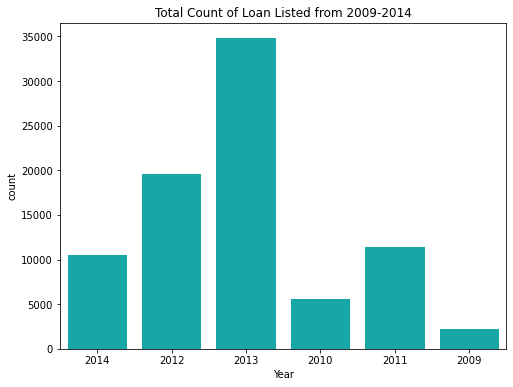

In [31]:
fig = plt.figure(figsize = [8,6])
sns.countplot(data = df_loan, x = 'year', color = 'c')
plt.xlabel('Year')
plt.title('Total Count of Loan Listed from 2009-2014')
plt.show()

## Distribution of main interest BorrowerAPR

From the above the borrower APR looks multimodal largest peak from 0.30-0.37 while the smallest peak is  from 0.0-0.1 and 0.4

Text(0.5, 0, 'Borrower APR')

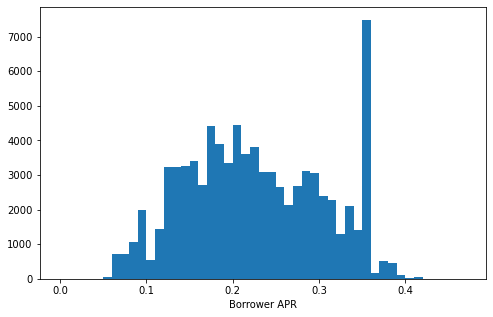

In [32]:
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')

## Debt to Income ratio

The highest value in the distribution is around 0.3

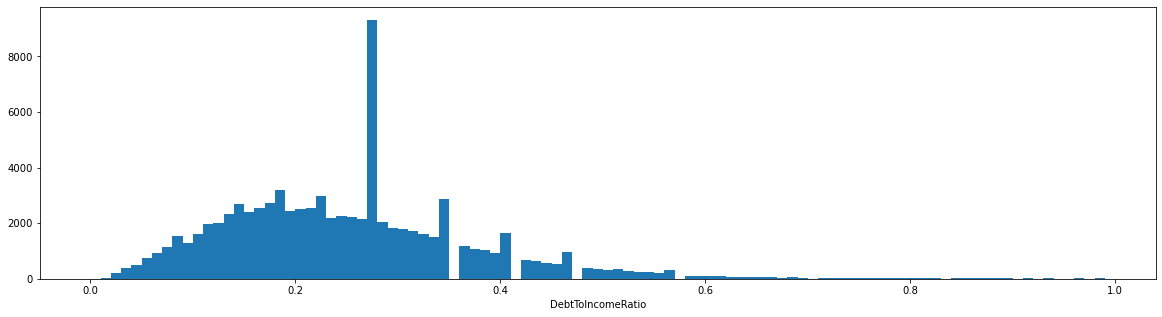

In [33]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[20, 5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');

### Distribution of loan original amount

Highest loan amount is between 1k to  5k while the lowest loan amount is 30k

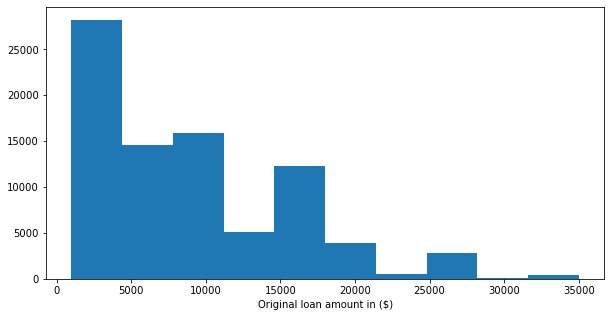

In [34]:
plt.figure(figsize=[10, 5])
plt.hist(df_loan['LoanOriginalAmount']);
plt.xlabel('Original loan amount in ($)');

### Monthly income distibution

This distribution is right- skewed.People who earn 5k are the highest in this distribution and around 30k as the lowest. 

Text(0.5, 1.0, 'Monthly income distribution')

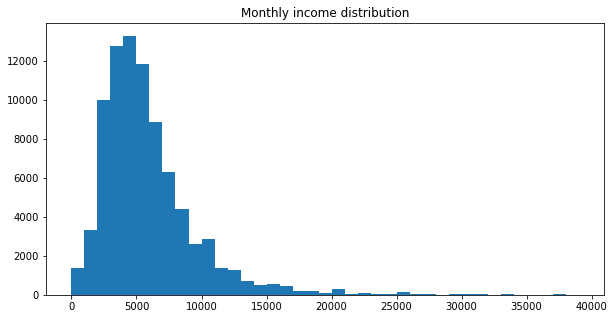

In [35]:
plt.figure(figsize=[10, 5])
bins = np.arange(0, 40000, 1000)
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins);
plt.title("Monthly income distribution")

### The unique values for employment status

In [36]:
df_loan.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

The Employment status of loan applicants

The highest number of loan applicants are the employed while the least are the retired and the part time

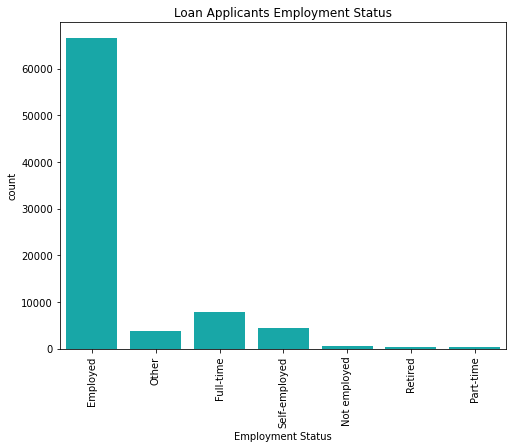

In [37]:
fig = plt.figure(figsize = [8,6])
sns.countplot(data = df_loan, x = 'EmploymentStatus', color = 'c')
plt.xlabel('Employment Status')
plt.title('Loan Applicants Employment Status')
plt.xticks(rotation=90)
plt.show()

### Listing Category

The highest Number of loan applicants were those that applied for debt consolidation

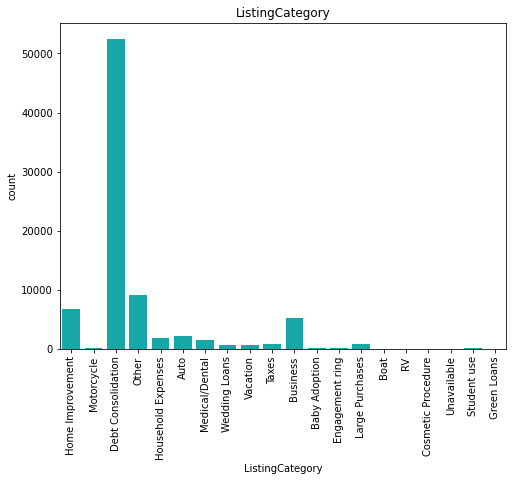

In [38]:
fig = plt.figure(figsize = [8,6])
sns.countplot(data = df_loan, x = 'ListingCategory', color = 'c')
plt.xlabel('ListingCategory')
plt.title('ListingCategory')
plt.xticks(rotation=90)
plt.show()

### Occupation of the applicants

* The least of borrowers are students while the highest are the employed in the other category

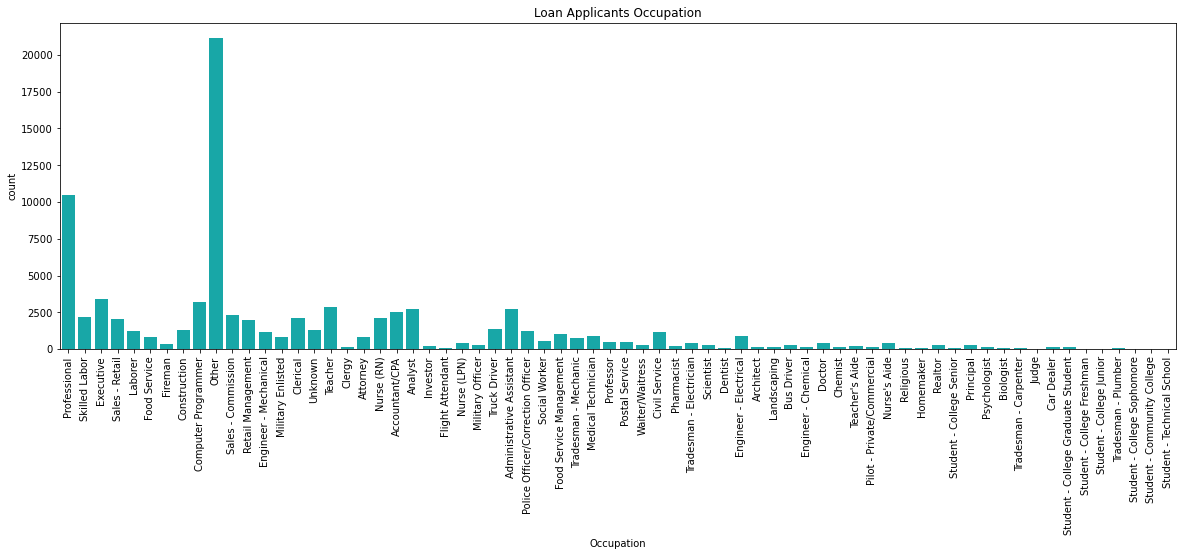

In [39]:
fig = plt.figure(figsize = [20,6])
color = sns.color_palette()[7]
sns.countplot(data = df_loan, x = 'Occupation',color='c')
plt.xlabel('Occupation')
plt.title('Loan Applicants Occupation')
plt.xticks(rotation=90)
plt.show()

## Prosper ratings of Applicants

* Most applicants that apply have a C prosper rating which is 6-8.99%

In [40]:
ordered_rate =['HR','E','D','C','B','A','AA']
rate = pd.api.types.CategoricalDtype(ordered = True,categories = ordered_rate)
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(rate)

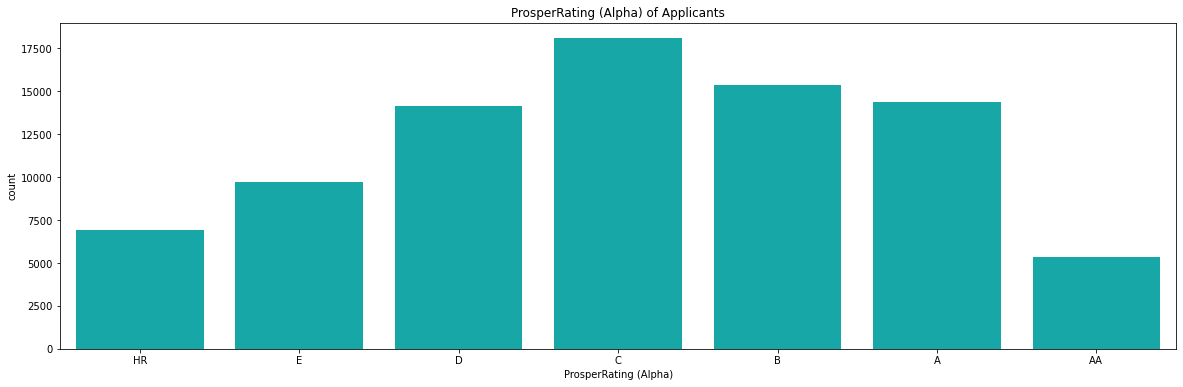

In [41]:
fig = plt.figure(figsize = [20,6])
color = sns.color_palette()[7]
sns.countplot(data = df_loan, x = 'ProsperRating (Alpha)',color='c')
plt.xlabel('ProsperRating (Alpha)')
plt.title('ProsperRating (Alpha) of Applicants')

plt.show()

## Loan Term

* Most people applied for 36 months

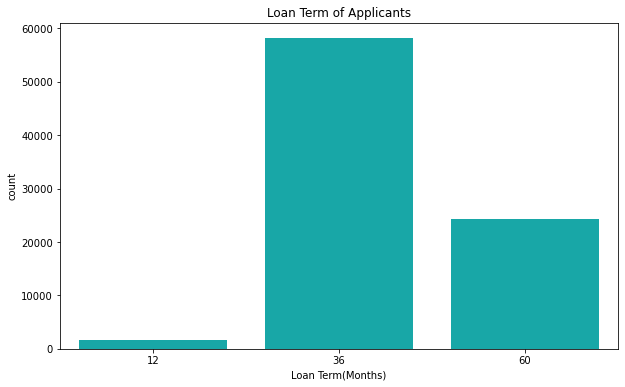

In [42]:
fig = plt.figure(figsize = [10,6])
color = sns.color_palette()[7]
sns.countplot(data = df_loan, x = 'Term',color='c')
plt.xlabel('Loan Term(Months)')
plt.title('Loan Term of Applicants')

plt.show()



## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. In the first bar chart, the year with the highest loan application was in 2013 while the lowest was in 2009
2. The distribution in the Borrower APR in the histogram is multimodal with the largest peak from 0.30-0.37 
while the smallest peak is from 0.0-0.1 and 0.4.
3. The debt to income ratio had was unimodal with the peak at 0.3.
4. The distribution of the loan amount peaked around 4k and decreased. Thus the distrbution was rightly skewed.
5. The monthlyincome distribution is very righly skewed with the montly income peaking at 5k and decreasing to about 0 at around 31k.
6. In the Employment status, most people in data are employed that applied for loans.
7. In the occupation category, the most were others and the least loan applicants were students.
8. In the prosper rating category, most people that applied were in the 'C' rating category.
9. Most people applied for 36 months when they applied for loans.
10.The highest people that applied were for debt consolidation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* The borrowersAPR distribution was unimodal with several peaks.
* To tidy the data:
    * duplicates were removed.
    * Null values were removed.
    * For the Null values in the debttoincome ratio column, they were replaced with the mean of the rest of the null values in 
      the column.
    * The monthly income column was rounded to 2 decimal points since it is a monetary value. 
* The reason for the above tidy operations was to enable me to work well with the data and get gainful information from it.


# Bivariate Exploration

I will find the correlation between the numeric variables with a heatmap

* The prosper rating is negatively correlated to the Borrowers APR as the prosper rating increases, the borrower's APR reduces.
The correlation score is -0.96.
* The loan amount is also negative correlated to the Borrowers APR with a correlation score of -0.43.
* The prosper rating is postively correlated to the loanamount with a correlation score of 0.43
* The investors has a very weak postive correlation with the prosper rating with a correlation score of 0.31.

In [43]:
corr_var =['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio','Investors','ProsperRating (numeric)']

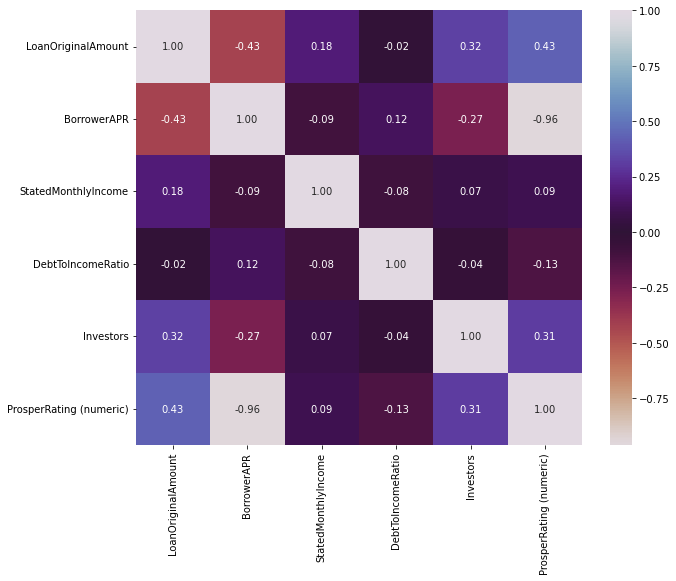

In [44]:
# correlation plot
plt.figure(figsize = [10, 8])
sns.heatmap(df_loan[corr_var].corr(), annot = True, fmt = '.2f',
           cmap = 'twilight_r', center = 0);

## Pair Grid Map

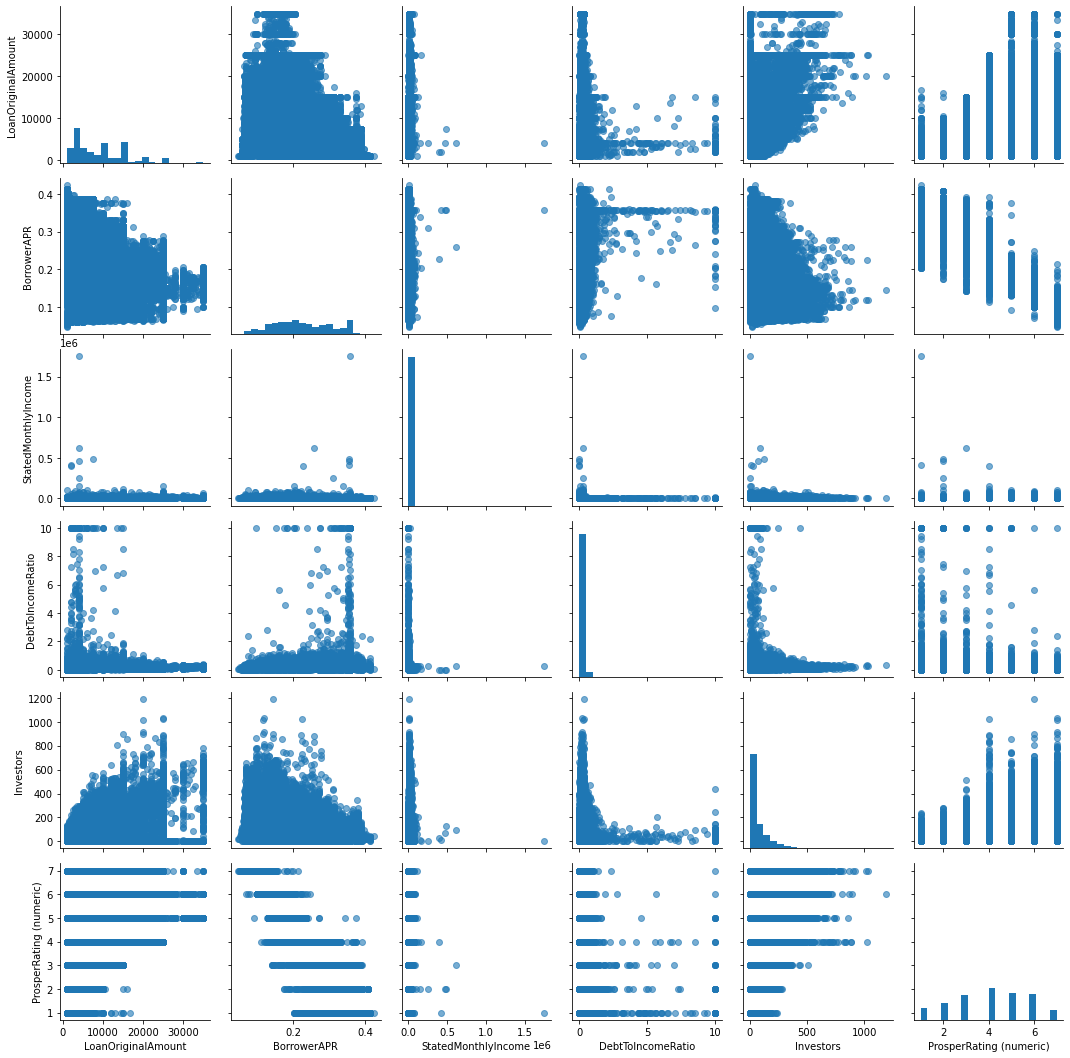

In [45]:
a = sns.PairGrid(data = df_loan, vars = corr_var)
a = a.map_diag(plt.hist, bins=20)
a.map_offdiag(plt.scatter, alpha=0.6);

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\miniconda3\lib\s

<Figure size 720x720 with 0 Axes>

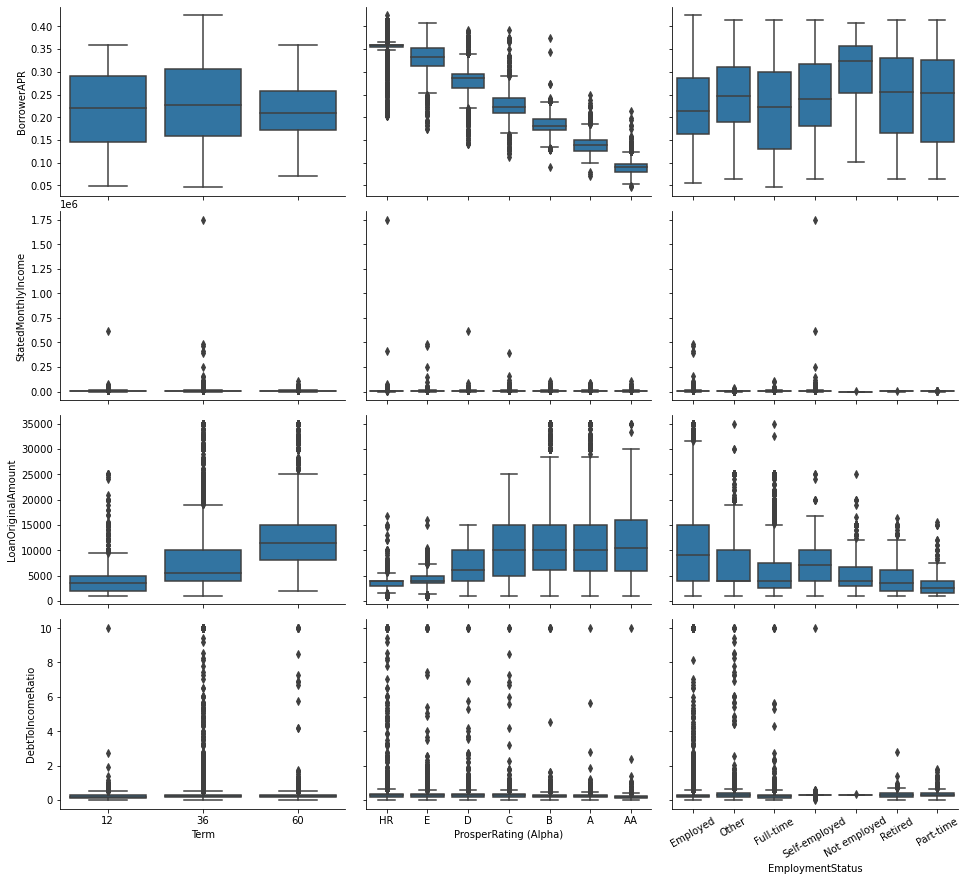

In [46]:
def box(x, y, **kwargs):
    color = sns.color_palette()[0]
    sns.boxplot(x, y, color = color)

plt.figure(figsize = [10, 10])
y = sns.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 3, aspect = 1.5)
y.map(box);
plt.xticks(rotation=30);

## For the investors

* In the clustered data chart, the first chart between the Proper rating and the Loan term, more people had 36 months loan term, 
with the highest on 'A'. "C" rating had the highest number with 60months loan term. The 'HR' only had loan term of 36 months. 
* In the employment status, the Employed category had the highest in loan term of 12, 36 and 60months while retired and part-time had
the lowest.
* In the Employment status and Prosper rating category, the employed category had the highest count while the partime had the lowest count against 
the category

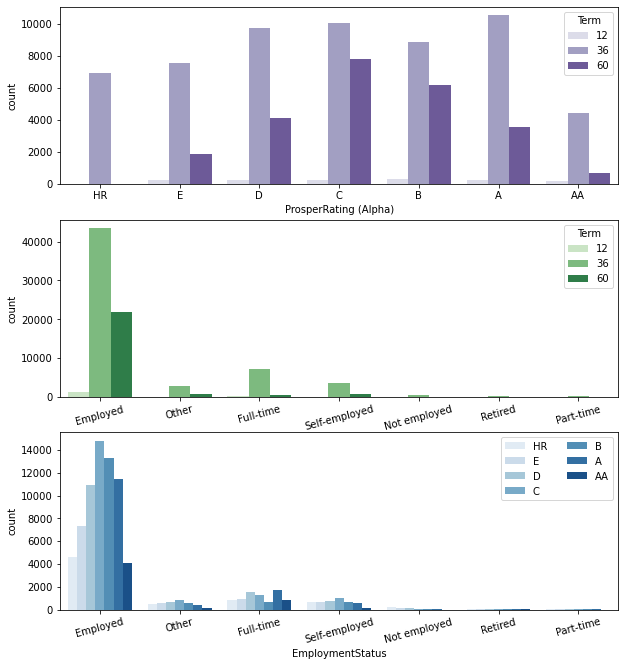

In [48]:
plt.figure(figsize = [10, 15])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sns.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Purples')

# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sns.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
plt.xticks(rotation = 15)


# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sns.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

## For the investors

* Investors like to invest with people with an AA rating.

<Figure size 720x576 with 0 Axes>

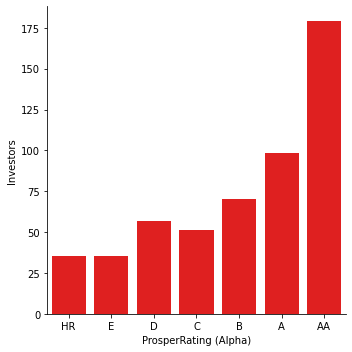

In [49]:
plt.figure(figsize = [10, 8])
sns.catplot(data=df_loan, x='ProsperRating (Alpha)', y="Investors", kind='bar', ci=None,color='r')


## Listing versus Investors

* The highest number of investors are in the business category, followed by student use and then home improvement in that order

Text(0, 0.5, 'Average Number of Investors')

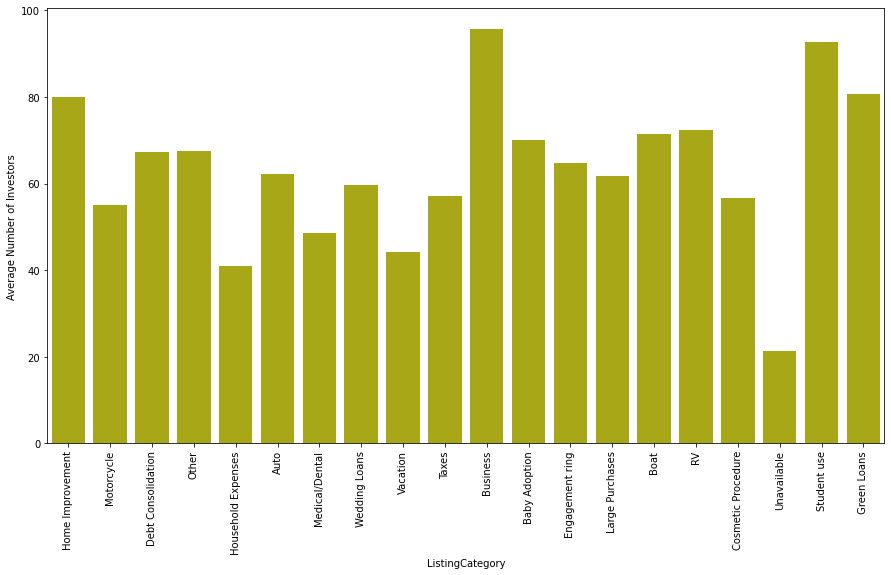

In [50]:
plt.figure(figsize = [15, 8])
sns.barplot(data=df_loan, x='ListingCategory', y="Investors",  ci=None,color='y')
plt.xticks(rotation=90)
plt.ylabel('Average Number of Investors')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* The prosper rating is negatively correlated to the Borrowers APR as the prosper rating increases, the borrower's APR reduces.
The correlation score is -0.96.
* The loan amount is also negative correlated to the Borrowers APR with a correlation score of -0.43.
* The prosper rating is postively correlated to the loanamount with a correlation score of 0.43
* The investors has a weak correlation with the statedmontly income.
* Investors like to invest with people with an AA rating.
* The highest number of investors are in the business category, followed by student use and then home improvement in that order.


## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* In the clustered data chart, the first chart between the Proper rating and the Loan term, more people had 36 months loan term, with the highest on 'A'. "C" rating had the highest number with 60months loan term. The 'HR' only had loan term of 36 months.
* In the employment status, the Employed category had the highest in loan term of 12, 36 and 60months while retired and part-time had the lowest.
* In the Employment status and Prosper rating category, the employed category had the highest count while the partime had the lowest count against the category.
* The statedmonthly income is not a strong factor to borrowing or lending. It is very interesting as it seems they look more on the prosper rating score more closely as it is positively correlated to the investors and negatively correlated to the Borrower's APR.

# Multivariate Exploration

#### The relationship among prosper rating, borrowers'APR and LoanAmount

* It is noted that the graph is negative in the 'HR' category and tends to positve when it reaches the 'A' category 
and the 'AA' category. The 'A' and 'AA' category has the lowest risk. It will be profitable to encourage them in this category
to borrow more to get more profit.


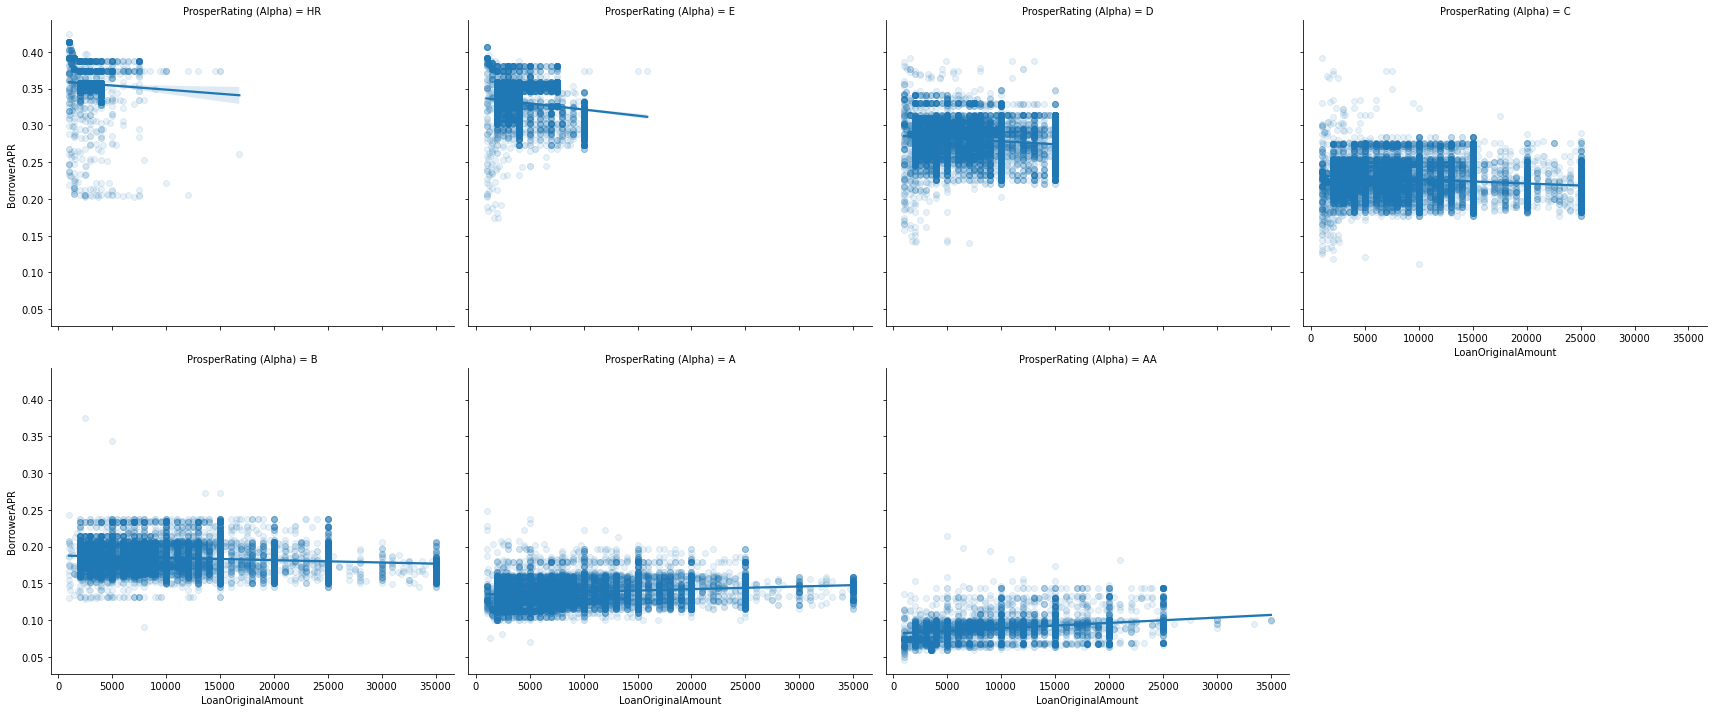

In [51]:
g=sns.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

#### Determing the mean borrower's APR for each loan terms among the prosper rating category

* The 'HR' has the highest borrowers APR and this category borrows only for 36 months. The least borrower's APR are those in 
the "AA" category. In short the Borrowers' APR decreases as the Prosperrating increases.

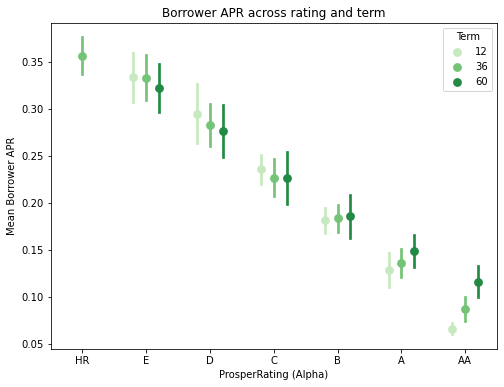

In [52]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

#### Determing the mean borrower's APR for each Employment status among the prosper rating category

Full time has the lowest mean Borrower's APR while the unemployed has the highest mean APR.

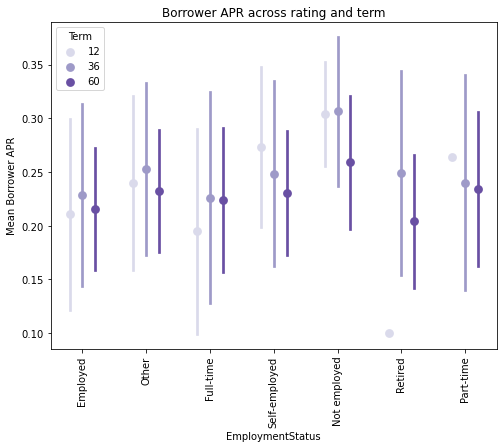

In [53]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

#### Determing the borrowers APR with the loan term and the listing category

The home improvement had the lowest mean borrowes' APR while the taxes category had the highes mean borrower's APR. 

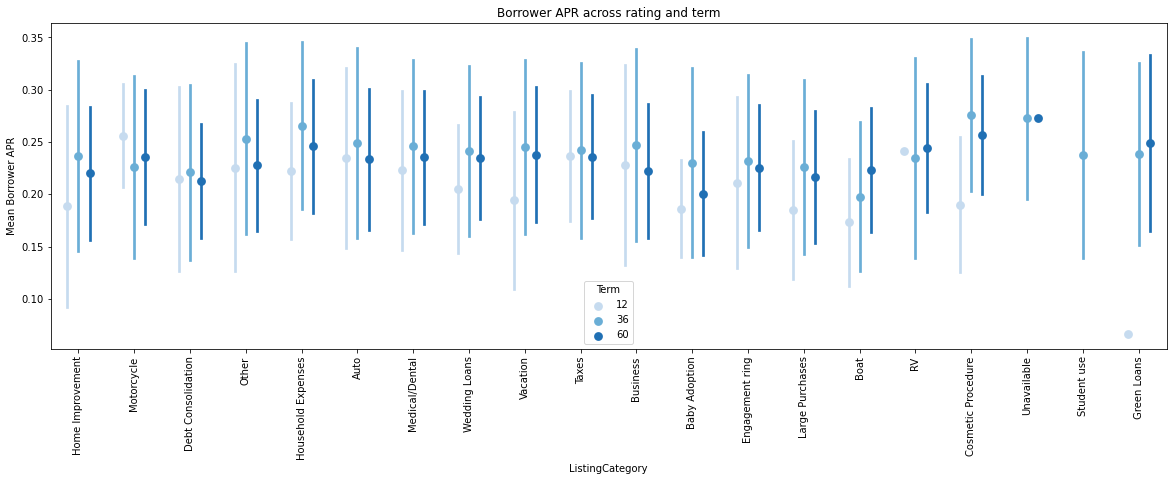

In [54]:
fig = plt.figure(figsize = [20,6])
ax = sns.pointplot(data = df_loan, x = 'ListingCategory', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

## The relationship among prosper rating, Investors and LoanAmount

* The number of investors increases as the prosper rating gets better. The highest mean of investors in the Loan term was in 
60months and in the "AA" category.

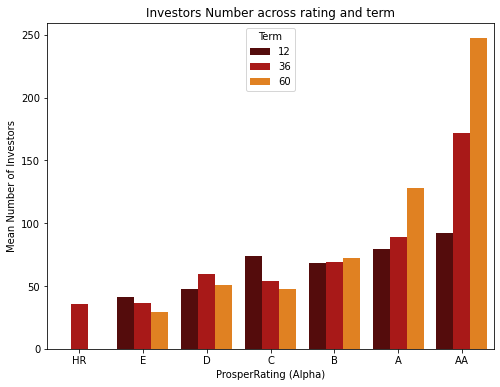

In [56]:
fig = plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'Investors', hue = 'Term',
           palette = 'gist_heat', ci=None)
plt.title('Investors Number across rating and term')
plt.ylabel('Mean Number of Investors')
ax.set_yticklabels([],minor = True);


## Investors across loan amount and prosper rating

* The relationship among the investors,ratings and the loan amount is a positive correlations that becomes strongly positive as the ratings improves. Thus 'AA' has a stong positive correlation with the investors. With better prosper ratings makes investors interested to lend.

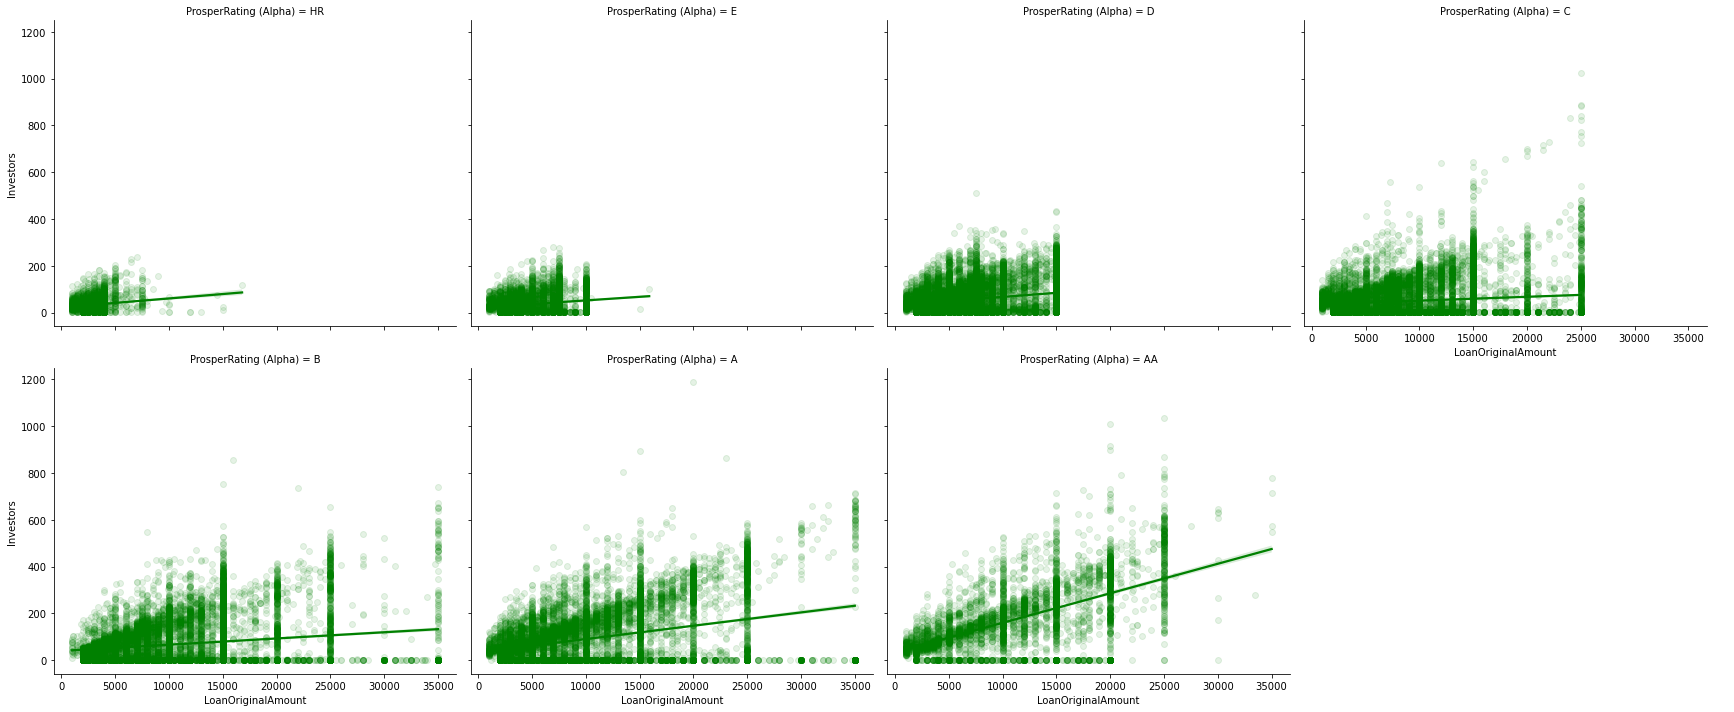

In [57]:
g=sns.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'Investors', x_jitter=0.05, scatter_kws={'alpha':0.1},color='green');
g.add_legend();

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* It is noted that the graph is negative in the 'HR' category and tends to positve when it reaches the 'A' category and the 'AA' category. The 'A' and 'AA' category has the lowest risk. 
It will be profitable to encourage them in this category to borrow more to get more profit.
* The 'HR' has the highest borrowers APR and this category borrows only for 36 months. The least borrower's APR are those in the "AA" category. 
In short the Borrowers' APR decreases as the Prosperrating increases.
* Full time has the lowest mean Borrower's APR while the unemployed has the highest mean APR.
* The home improvement had the lowest mean borrowes' APR while the taxes category had the highes mean borrower's APR.
* The number of investors increases as the prosper rating gets better. The highest mean of investors in the Loan term was in 60months and in the "AA" category.
* The relationship among the investors,ratings and the loan amount is a positive correlations that becomes strongly positive as the ratings improves. Thus 'AA' has a stong positive correlation with the investors.
With better prosper ratings makes investors interested to lend.

## Were there any interesting or surprising interactions between features?

* Interestingly in the 'HR' category is negative till category 'B' and tends to positve when it reaches the 'A' category and the 'AA' category. The 'A' and 'AA' category has the lowest risk. 
It will be profitable to encourage them in this category to borrow more to get more profit.

# Conclusions

### For the Univariate Explorations:
1.  In the first bar chart, the year with the highest loan application was in 2013 while the lowest was in 2009
2.  The distribution in the Borrower APR in the histogram is multimodal with the largest peak from 0.30-0.37 
while the smallest peak is from 0.0-0.1 and 0.4.
3.  The debt to income ratio had was unimodal with the peak at 0.3.
4.  The distribution of the loan amount peaked around 4k and decreased. Thus the distrbution was rightly skewed.
5.  The monthlyincome distribution is very righly skewed with the montly income peaking at 5k and decreasing to about 0 at around 31k.
6.  In the Employment status, most people in data are employed that applied for loans.
7.  In the occupation category, the most were others and the least loan applicants were students.
8.  In the prosper rating category, most people that applied were in the 'C' rating category.
9.  Most people applied for 36 months when they applied for loans.
10. The highest people that applied were for debt consolidation.

### For the Bivariate Exploration:
11. The prosper rating is negatively correlated to the Borrowers APR as the prosper rating increases, the borrower's APR reduces. The correlation score is -0.96.
12. The loan amount is also negative correlated to the Borrowers APR with a correlation score of -0.43.
13. The prosper rating is postively correlated to the loanamount with a correlation score of 0.43
14. The investors has a weak correlation with the statedmontly income.
15. Investors like to invest with people with an AA rating.
16. The highest number of investors are in the business category, followed by student use and then home improvement in that order.
#### Interesting features in the bivariate explorations include:
17. In the clustered data chart, the first chart between the Proper rating and the Loan term, more people had 36 months loan term, with the highest on 'A'.
18. "C" rating had the highest number with 60months loan term. The 'HR' only had loan term of 36 months.
19. In the employment status, the Employed category had the highest in loan term of 12, 36 and 60months 
while retired and part-time had the lowest.
20. In the Employment status and Prosper rating category, the employed category had the highest count 
while the partime had the lowest count against the category.
21. The statedmonthly income is not a strong factor to borrowing or lending. It is very interesting 
as it seems they look more on the prosper rating score more closely as it is positively correlated 
to the investors and negatively correlated to the Borrower's APR.

### Multivariate Explorations:
22. It is noted that the graph is negative in the 'HR' category and tends to positve when it reaches the 
'A' category and the 'AA' category. The 'A' and 'AA' category has the lowest risk. It will be profitable to encourage them in this category to borrow more to get more profit.
23. The 'HR' has the highest borrowers APR and this category borrows only for 36 months. The least borrower's 
APR are those in the "AA" category. In short the Borrowers' APR decreases as the Prosperrating increases.
24. Full time category in the Employment status has the lowest mean Borrower's APR while the unemployed has the 
highest mean APR.
25. The home improvement had the lowest mean borrowes' APR while the taxes category had the highes mean borrower's APR.
26. The number of investors increases as the prosper rating gets better. The highest mean of investors in the Loan term was
in 60months and in the "AA" category.
27. The relationship among the investors,ratings and the loan amount is a positive correlations that becomes strongly 
positive as the ratings improves. Thus 'AA' has a stong positive correlation with the investors.
With better prosper ratings makes investors interested to lend.
    

In [ ]:
# save the cleaned dataset for explanatory data analysis
df_loan.to_csv('ProsperLoan_cleaned.csv')